<a href="https://colab.research.google.com/gist/22961-Deep-learning/46c03b3af08b40b8dd0f9bc42f3e197d/22961_2_2_4_single_layer_training_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
trans=torchvision.transforms.Compose(
    [torchvision.transforms.PILToTensor(),
     torchvision.transforms.ConvertImageDtype(torch.float)])
train_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=True,
    transform=trans)


In [3]:
from torch import nn
model = nn.Sequential(
          nn.Linear(784,10),    #z
          nn.LogSoftmax(dim=1)  #log(y)
          )
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): LogSoftmax(dim=1)
)


In [4]:
CE_loss=nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [5]:
def iterate_batch():
  imgs, labels = next(iter(train_dataloader))
  imgs = imgs.flatten(start_dim=1)
  optimizer.zero_grad()
  y_model=model(imgs)
  
  loss=CE_loss(y_model,labels)
  loss.backward()
  optimizer.step()
  
  predicted_labels = y_model.argmax(dim=1)
  acc = (predicted_labels == labels).sum()/len(labels)
  return loss.detach(), acc.detach()

In [6]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(
    train_data_transformed, batch_size=256, shuffle=True)
len(train_dataloader) #num of batches in epoch

235

In [8]:
from tqdm import tqdm
batches=len(train_dataloader)
batch_loss=torch.zeros(batches)
batch_acc=torch.zeros(batches)
for idx in tqdm(range(batches)):
    batch_loss[idx], batch_acc[idx] = iterate_batch()

100%|██████████| 235/235 [00:40<00:00,  5.76it/s]


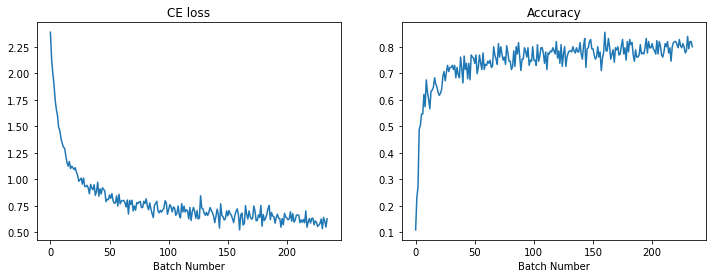

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(batches),batch_loss);
plt.title("CE loss");
plt.xlabel("Batch Number");
plt.subplot(1,2,2)
plt.plot(range(batches),batch_acc);
plt.title("Accuracy");
plt.xlabel("Batch Number");

# Train vs Test 

In [ ]:
test_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=False, download=True,
    transform=trans)
len(test_data_transformed)
test_dataloader = DataLoader(
    test_data_transformed, batch_size=256)

In [ ]:
def eval_model_test():
  loss=0.
  acc=0.
  test_batches=len(test_dataloader)
  for imgs, labels in test_dataloader:
    imgs = imgs.flatten(start_dim=1)
    with torch.no_grad():
      y_model=model(imgs) 
      loss += CE_loss(y_model,labels)
      predicted_labels = y_model.argmax(dim=1)
      acc += (predicted_labels == labels).sum()/len(labels)
  return loss/test_batches, acc/test_batches

In [ ]:
eval_model_test()

(tensor(0.6280), tensor(0.7873))

In [ ]:
def iterate_epoch():
    running_loss=0.
    running_acc=0.
    for batch_idx in range(batches):
      batch_loss, batch_acc = iterate_batch()
      running_loss += batch_loss
      running_acc +=  batch_acc
    loss=running_loss/batches
    acc=running_acc/batches
    return loss, acc

In [ ]:
epochs=5
batches=len(train_dataloader)
loss_train=torch.zeros(epochs)
acc_train=torch.zeros(epochs)
loss_test=torch.zeros(epochs)
acc_test=torch.zeros(epochs)

model[0].reset_parameters()
for epoch_idx in tqdm(range(epochs)):
  loss_train[epoch_idx],acc_train[epoch_idx] = iterate_epoch()
  loss_test[epoch_idx], acc_test[epoch_idx] = eval_model_test()

 60%|██████    | 3/5 [12:53<06:00, 180.11s/it]

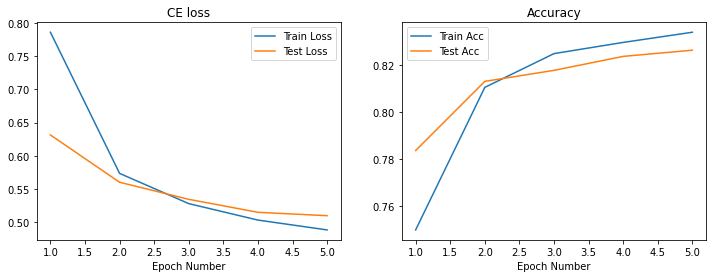

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),loss_train,label="Train Loss");
plt.plot(range(1,epochs+1),loss_test,label="Test Loss");
plt.title("CE loss");
plt.legend()
plt.xlabel("Epoch Number");
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),acc_train,label="Train Acc");
plt.plot(range(1,epochs+1),acc_test,label="Test Acc");
plt.title("Accuracy");
plt.legend()
plt.xlabel("Epoch Number");

# Deep Network

In [ ]:
model = nn.Sequential(
          nn.Linear(784,100),
          nn.ReLU(),
          nn.Linear(100,10),
          nn.ReLU(),
          nn.Linear(10,10),
          nn.ReLU(),
          nn.Linear(10,10),  
          nn.LogSoftmax(dim=1)  
          )
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [ ]:
def reset_model_params():
  for layer in model.children():
    if hasattr(layer, 'reset_parameters'):
      layer.reset_parameters()


In [ ]:
epochs=5
batches=len(train_dataloader)
loss_train=torch.zeros(epochs)
acc_train=torch.zeros(epochs)
loss_test=torch.zeros(epochs)
acc_test=torch.zeros(epochs)


reset_model_params()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
for epoch_idx in tqdm(range(epochs)):
  loss_train[epoch_idx],acc_train[epoch_idx] = iterate_epoch()
  loss_test[epoch_idx], acc_test[epoch_idx] = eval_model_test()

100%|██████████| 5/5 [01:41<00:00, 20.33s/it]


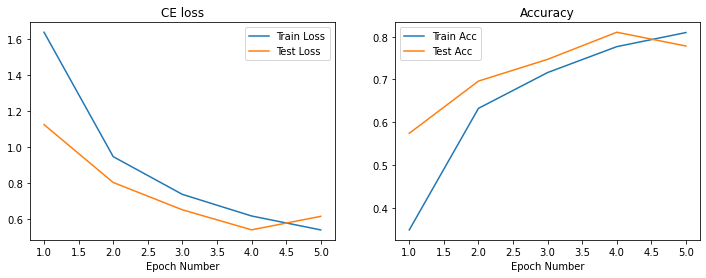

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),loss_train,label="Train Loss");
plt.plot(range(1,epochs+1),loss_test,label="Test Loss");
plt.title("CE loss");
plt.legend()
plt.xlabel("Epoch Number");
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),acc_train,label="Train Acc");
plt.plot(range(1,epochs+1),acc_test,label="Test Acc");
plt.title("Accuracy");
plt.legend()
plt.xlabel("Epoch Number");